In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df.shape

(3276, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.fillna(df.mean(),inplace=True)

In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

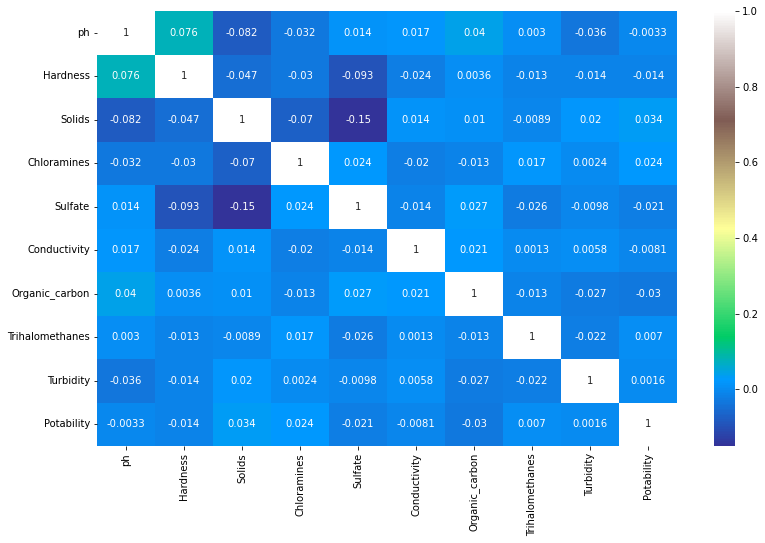

In [11]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap="terrain")
plt.show()

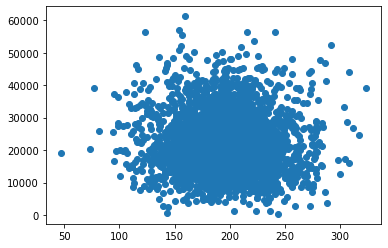

In [12]:
plt.scatter(df['Hardness'],df['Solids'])
plt.show()

In [13]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 0 categorical variables

The categorical variables are :

 []


In [14]:
df[categorical].isnull().sum()

Series([], dtype: float64)

In [39]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [40]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [42]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
909,7.016836,167.362187,18014.995703,5.903058,362.523416,471.484395,10.692588,45.002014,4.101398
900,7.080795,191.348259,14017.372066,6.490700,345.560481,423.978389,11.863248,65.791687,4.167336
895,4.487517,199.051403,36860.468899,9.751561,338.049428,390.566945,8.123470,75.668785,2.765722
743,8.137713,178.716633,33786.716309,9.101885,333.775777,481.073539,12.273181,95.905288,2.743867
476,8.237143,190.059695,20015.398106,8.385217,356.091761,377.682097,17.740944,37.713878,4.939109
...,...,...,...,...,...,...,...,...,...
835,7.440825,183.362713,17259.852302,4.610245,335.626443,452.995293,9.700906,80.537065,2.496343
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702
1653,6.648005,191.841801,15176.290678,5.661663,333.775777,471.047129,15.438287,56.532387,3.829784
2607,7.675914,233.300759,23673.100606,8.407497,333.775777,232.613624,18.459408,60.993590,5.040461


In [43]:
y_train

909     0
900     0
895     0
743     1
476     0
       ..
835     0
3264    1
1653    0
2607    0
2732    1
Name: Potability, Length: 2457, dtype: int64

In [44]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2017,8.111953,217.266472,38184.469574,7.254122,311.910224,281.069203,13.027921,78.582094,4.430750
2533,6.768060,179.805992,23793.031358,5.332099,333.198191,461.530446,13.557381,60.571241,4.145807
589,7.080795,180.893036,17705.608616,6.223312,350.195253,447.937123,10.461025,32.074863,3.999125
482,7.705711,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956
2620,5.830542,165.467025,30021.257079,8.433097,334.397777,494.154505,16.666613,69.580253,5.192117
...,...,...,...,...,...,...,...,...,...
940,8.966836,228.691355,16764.854765,7.137871,320.555995,456.426489,12.599998,77.330137,3.654355
1109,7.080795,214.657331,19692.464394,5.947390,326.175709,385.827829,15.563460,77.834036,3.261651
758,7.080795,204.852187,13286.156575,9.093843,332.845544,365.687520,8.589896,76.306376,4.268525
3216,5.609235,216.122673,14825.934502,7.001788,355.211678,330.092674,9.779518,41.249977,3.224676


In [45]:
y_test

2017    1
2533    0
589     0
482     0
2620    0
       ..
940     0
1109    1
758     1
3216    1
414     0
Name: Potability, Length: 819, dtype: int64

In [46]:
#naive bayes
from sklearn.naive_bayes import GaussianNB  
naive = GaussianNB()  
naive.fit(x_train, y_train) 

GaussianNB()

In [47]:
y_pred3=naive.predict(x_test)  
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [56]:
s=[]
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
cm3= confusion_matrix(y_test,y_pred3)  
cm3

array([[435,  67],
       [251,  66]], dtype=int64)

In [57]:
print("Accuracy Score for Naive Bayes :",accuracy_score(y_test,y_pred3)*100)
s.append(accuracy_score(y_test,y_pred3)*100)

Accuracy Score for Naive Bayes : 61.172161172161175


In [58]:
res2=naive.predict([[5.73,158.31,25363.01,7.73,377.55,568.31,13.63,75.96,4.74]])[0]
res2

0

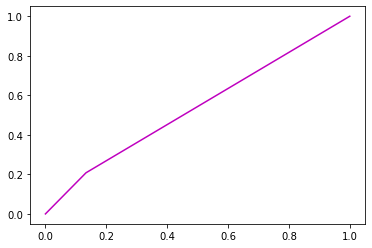

In [65]:
fpr,tpr,threshold3=roc_curve(y_test,y_pred3)
plt.plot(fpr,tpr,'m')

In [66]:
#ada boost
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5,learning_rate=1)
ad.fit(x_train,y_train)
p=ad.predict(x_test)
cm3=confusion_matrix(y_test,p)
cm3

array([[326, 176],
       [171, 146]], dtype=int64)

In [67]:
TP,FP,FN,TN=cm3.ravel()
print("Acuuracy :",(TP+TN)/float(TP+TN+FP+FN))
print("Recall :",(TP)/float(TP+FN))
print("Specifity :",(TN)/float(TN+FP))
print("Precision :",(TP)/float(TP+FP))


Acuuracy : 0.5763125763125763
Recall : 0.6559356136820925
Specifity : 0.453416149068323
Precision : 0.649402390438247


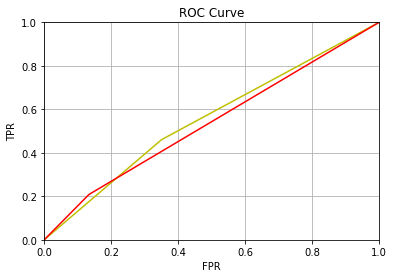

In [68]:
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
p=ad.predict(x_test)
fpr2,tpr2,threshhold=metrics.roc_curve(y_test,p)
plt.plot(fpr2,tpr2,'y')
plt.plot(fpr,tpr,'r')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid(True)

In [69]:
from sklearn.metrics import roc_auc_score
print("AUC :",metrics.roc_auc_score(y_test,p))


AUC : 0.5549851068910479


In [70]:
print("Accuracy Score for ada boost :",accuracy_score(y_test,p)*100)
s.append(accuracy_score(y_test,p)*100)

Accuracy Score for ada boost : 57.631257631257625


In [71]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier(n_estimators=10,learning_rate=0.5)
gd.fit(x_train,y_train)
pr=gd.predict(x_test)
cm4=confusion_matrix(y_test,pr)
cm4

array([[455,  47],
       [250,  67]], dtype=int64)

In [72]:
TP,FP,FN,TN=cm4.ravel()
print("Acuuracy :",(TP+TN)/float(TP+TN+FP+FN))
print("Recall :",(TP)/float(TP+FN))
print("Specifity :",(TN)/float(TN+FP))
print("Precision :",(TP)/float(TP+FP))


Acuuracy : 0.6373626373626373
Recall : 0.6453900709219859
Specifity : 0.5877192982456141
Precision : 0.9063745019920318


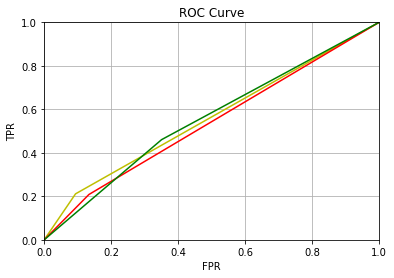

In [74]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
pr=gd.predict(x_test)
fpr5,tpr5,threshhold=metrics.roc_curve(y_test,pr)
plt.plot(fpr5,tpr5,'y')
plt.plot(fpr,tpr,'r')
plt.plot(fpr2,tpr2,'g')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid(True)

In [75]:
print("Accuracy Score for gradient boosting :",accuracy_score(y_test,pr)*100)
s.append(accuracy_score(y_test,pr)*100)

Accuracy Score for ada boost : 63.73626373626373


In [76]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
cm1=confusion_matrix(y_test,pred)
cm1


array([[439,  63],
       [223,  94]], dtype=int64)

In [77]:
TP,FP,FN,TN=cm1.ravel()
print("Acuuracy :",(TP+TN)/float(TP+TN+FP+FN))
print("Recall :",(TP)/float(TP+FN))
print("Specifity :",(TN)/float(TN+FP))
print("Precision :",(TP)/float(TP+FP))


Acuuracy : 0.6507936507936508
Recall : 0.6631419939577039
Specifity : 0.5987261146496815
Precision : 0.8745019920318725


Accuracy Score for random forest : 65.07936507936508


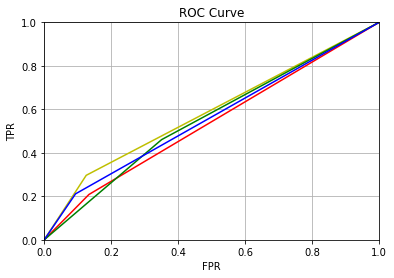

In [82]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
pred_prob=rf.predict(x_test)
fpr4,tpr4,threshhold=metrics.roc_curve(y_test,pred_prob)
plt.plot(fpr4,tpr4,'y')
plt.plot(fpr,tpr,'r')
plt.plot(fpr2,tpr2,'g')
plt.plot(fpr5,tpr5,'b')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.grid(True)
print("Accuracy Score for random forest :",accuracy_score(y_test,pred)*100)
s.append(accuracy_score(y_test,pred)*100)

In [83]:
c_name=["Naive Bayes","ADA BOOST","Gradient Boosting","Random Forest"]
d={'CLASSIFIER':c_name,'ACCURACY SCORE':s}
dt=pd.DataFrame(d)
dt

,CLASSIFIER,ACCURACY SCORE
0,Naive Bayes,61.172161
1,ADA BOOST,57.631258
2,Gradient Boosting,63.736264
3,Random Forest,65.079365


In [88]:
print("The Best Classifier is",c_name[-1],"with Accuracy of :",max(s))

The Best Classifier  is Random Forest with Accuracy of : 65.07936507936508
